## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

torch.Size([1, 28, 28])


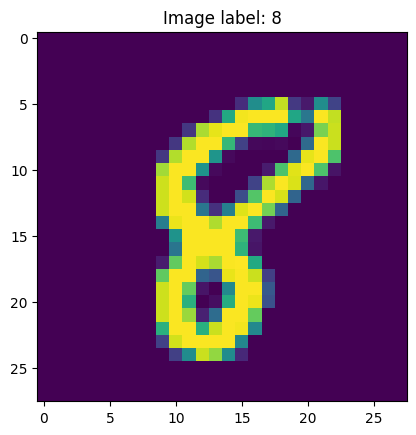

In [7]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_mnist_data = MNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
print(_image.shape)
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
plt.show()
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [6]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [18]:
sfm = nn.Softmax(dim=1)
x = torch.ones((5, 3))
sfm(x)

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])

In [19]:
class FCNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
#         self.sfm = self.Softmax(dim=1)
    
    def forward(self, x):
        x_f = self.flatten(x)
        logits = self.linear_relu_stack(x_f)
#         probas = self.sof
        return logits

In [20]:
# Creating model instance
model = FCNetwork()  # your code here

Локальные тесты для проверки вашей модели доступны ниже:

In [21]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, "Please, use `model` variable to store your model"

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print("Something is wrong with the model")
    raise e


assert y_predicted.shape[-1] == 10, "Model should predict 10 logits/probas"

print("Everything seems fine!")
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [24]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [25]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss:{test_loss:>8f} \n")

In [27]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------")
    train(train_data_loader, model, loss_fn, optimizer)
    test(test_data_loader, model, loss_fn)

Epoch 1
---------------------
loss: 2.292557 [   32/60000]
loss: 0.621755 [ 3232/60000]
loss: 0.510474 [ 6432/60000]
loss: 0.262927 [ 9632/60000]
loss: 0.309801 [12832/60000]
loss: 0.136081 [16032/60000]
loss: 0.033521 [19232/60000]
loss: 0.413048 [22432/60000]
loss: 0.360634 [25632/60000]
loss: 0.298716 [28832/60000]
loss: 0.482359 [32032/60000]
loss: 0.064129 [35232/60000]
loss: 0.117424 [38432/60000]
loss: 0.024481 [41632/60000]
loss: 0.207020 [44832/60000]
loss: 0.447086 [48032/60000]
loss: 0.101452 [51232/60000]
loss: 0.057341 [54432/60000]
loss: 0.229086 [57632/60000]
Test Error: 
 Accuracy: 96.4%, Avg loss:0.116189 

Epoch 2
---------------------
loss: 0.052052 [   32/60000]
loss: 0.013722 [ 3232/60000]
loss: 0.069008 [ 6432/60000]
loss: 0.034473 [ 9632/60000]
loss: 0.015256 [12832/60000]
loss: 0.089099 [16032/60000]
loss: 0.007761 [19232/60000]
loss: 0.174310 [22432/60000]
loss: 0.281592 [25632/60000]
loss: 0.356272 [28832/60000]
loss: 0.068718 [32032/60000]
loss: 0.056515 [352

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [28]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [29]:
print(f"Neural network accuracy on train set: {train_acc:3.5}")

Neural network accuracy on train set: 0.99232


In [30]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [31]:
print(f"Neural network accuracy on test set: {test_acc:3.5}")

Neural network accuracy on test set: 0.9766


Проверка, что необходимые пороги пройдены:

In [32]:
assert test_acc >= 0.92, "Test accuracy is below 0.92 threshold"
assert (
    train_acc >= 0.91
), "Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow"

### Сдача задания
Загрузите файл `hw11_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки.

In [33]:
# do not change the code in the block below
# __________start of block__________
import os
import json

assert os.path.exists(
    "hw11_data_dict.npy"
), "Please, download `hw11_data_dict.npy` and place it in the working directory"


def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ",".join([str(x) for x in list(predicted_labels)])
    return predicted_labels


loaded_data_dict = np.load("hw11_data_dict.npy", allow_pickle=True)

submission_dict = {
    "train": get_predictions(
        model, torch.FloatTensor(loaded_data_dict.item()["train"])
    ),
    "test": get_predictions(model, torch.FloatTensor(loaded_data_dict.item()["test"])),
}

with open("submission_dict_hw11.json", "w") as iofile:
    json.dump(submission_dict, iofile)
print("File saved to `submission_dict_hw11.json`")
# __________end of block__________

AssertionError: Please, download `hw11_data_dict.npy` and place it in the working directory

In [37]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

File saved to `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!